WeatherPy

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from config import key_dict

# weather key
w_key = key_dict['owm']

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

Generate Cities List 

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
#print the city count to confirm sufficient count
print(len(cities))

613


Perform API Calls

Perform a weather check on each city using a series of successive API calls.
Include a print log of each city as it's being processed (with the city number and city name).

In [3]:
#create lists 
city_list = []
cloud = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
index_counter = 0
set_counter = 1

In [4]:
#perform API query and print log 
print("Beginning Data Retrieval ")
print("-------------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={w_key}&units={units}&q="

#loop for cities
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_list.append(response["name"])
        cloud.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
        
        else:
            index_counter = index_counter + 1
        
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}")
        
    except(KeyError, IndexError):
        print("City not found. Skipping...")
        
print("-------------------------------")
print("Data Retrieval Complete")
print("-------------------------------")

Beginning Data Retrieval 
-------------------------------
Processing Record 1 of Set 1 : rikitea
City not found. Skipping...
Processing Record 2 of Set 1 : ushuaia
Processing Record 3 of Set 1 : busselton
City not found. Skipping...
Processing Record 4 of Set 1 : sakakah
Processing Record 5 of Set 1 : saldanha
Processing Record 6 of Set 1 : kayes
Processing Record 7 of Set 1 : avarua
Processing Record 8 of Set 1 : punta arenas
Processing Record 9 of Set 1 : shitkino
Processing Record 10 of Set 1 : arman
Processing Record 11 of Set 1 : miandrivazo
Processing Record 12 of Set 1 : arraial do cabo
Processing Record 13 of Set 1 : kabanjahe
Processing Record 14 of Set 1 : yellowknife
Processing Record 15 of Set 1 : zalesovo
Processing Record 16 of Set 1 : albany
Processing Record 17 of Set 1 : abnub
Processing Record 18 of Set 1 : aquidauana
Processing Record 19 of Set 1 : saint-philippe
Processing Record 20 of Set 1 : puerto leguizamo
Processing Record 21 of Set 1 : vila velha
Processing Re

Processing Record 36 of Set 4 : mitchell
Processing Record 37 of Set 4 : parabel
Processing Record 38 of Set 4 : ancud
Processing Record 39 of Set 4 : bollnas
Processing Record 40 of Set 4 : eyl
Processing Record 41 of Set 4 : bagenalstown
Processing Record 42 of Set 4 : georgiyevskoye
Processing Record 43 of Set 4 : narsaq
Processing Record 44 of Set 4 : banda aceh
Processing Record 45 of Set 4 : hare bay
Processing Record 46 of Set 4 : luderitz
Processing Record 47 of Set 4 : itarema
Processing Record 48 of Set 4 : frontera comalapa
Processing Record 49 of Set 4 : usogorsk
Processing Record 50 of Set 4 : raton
Processing Record 0 of Set 5 : mar del plata
Processing Record 1 of Set 5 : umm kaddadah
Processing Record 2 of Set 5 : mercedes
City not found. Skipping...
Processing Record 3 of Set 5 : saint-denis
Processing Record 4 of Set 5 : mananjary
City not found. Skipping...
Processing Record 5 of Set 5 : geraldton
Processing Record 6 of Set 5 : grand forks
Processing Record 7 of Set 

Processing Record 19 of Set 8 : mangrol
Processing Record 20 of Set 8 : havoysund
Processing Record 21 of Set 8 : veraval
Processing Record 22 of Set 8 : beroroha
Processing Record 23 of Set 8 : talara
City not found. Skipping...
Processing Record 24 of Set 8 : sobolevo
Processing Record 25 of Set 8 : tucurui
Processing Record 26 of Set 8 : ziro
Processing Record 27 of Set 8 : dymer
Processing Record 28 of Set 8 : saysain
City not found. Skipping...
Processing Record 29 of Set 8 : tahta
Processing Record 30 of Set 8 : bud
Processing Record 31 of Set 8 : melfi
Processing Record 32 of Set 8 : teluk nibung
Processing Record 33 of Set 8 : fuyu
Processing Record 34 of Set 8 : schwandorf
Processing Record 35 of Set 8 : bahadurganj
Processing Record 36 of Set 8 : dingle
Processing Record 37 of Set 8 : omsukchan
Processing Record 38 of Set 8 : honningsvag
Processing Record 39 of Set 8 : san luis
Processing Record 40 of Set 8 : coihaique
Processing Record 41 of Set 8 : hvide sande
Processing Re

 Convert Raw Data to DataFrame

Export the city data into a .csv.Display the DataFrame

In [5]:
#Create a dataframe 
weather_info_df = pd.DataFrame({"City" : city_list,"Lat" : lat,"Lng" : lng,
    "Max Temp" : max_temp, "Humidity" : humidity,"Clouds" : cloud,
    "Wind Speed" : wind_speed, "Country" : country,"Date" : date    
})

weather_info_df.head()

,City,Lat,Lng,Max Temp,Humidity,Clouds,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,80.13,71,0,7.54,PF,1616357944
1,Ushuaia,-54.8000,-68.3000,55.40,58,40,18.41,AR,1616357707
2,Busselton,-33.6500,115.3333,64.99,95,80,3.00,AU,1616357988
3,Sakakah,29.9697,40.2064,73.40,17,0,4.61,SA,1616358327
4,Saldanha,-33.0117,17.9442,62.60,67,0,6.91,ZA,1616358034


In [6]:
#save weather df to csv file
weather_info_df.to_csv("output/weather_info_df.csv", index=False, header=True)

 Plotting the Data

Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.Save the plotted figures as .pngs.

Text(0, 0.5, 'Max Temperature (F)')

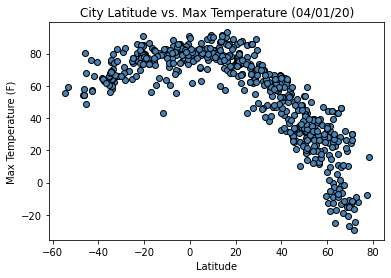

In [7]:
plt.scatter(weather_info_df["Lat"], weather_info_df["Max Temp"], color = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Max Temperature (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

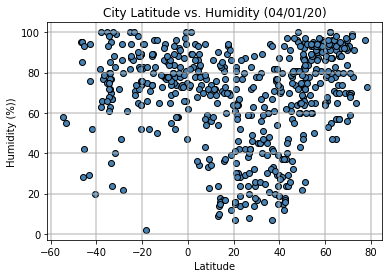

In [8]:
#Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_info_df["Lat"], weather_info_df["Humidity"], color = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Humidity (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%))")
plt.grid(linestyle='-', linewidth=2, alpha=0.5)

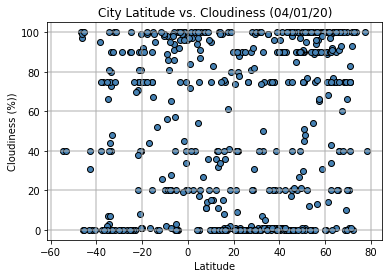

In [9]:
#Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_info_df["Lat"], weather_info_df["Clouds"], color = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Cloudiness (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%))")
plt.grid(linestyle='-', linewidth=2, alpha=0.5)

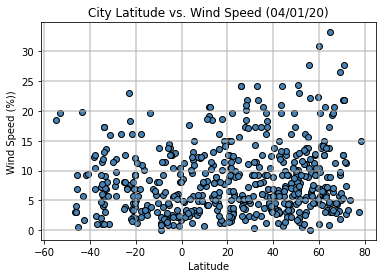

In [10]:
#Latitude vs. Wind Speed Plot scatter plot
plt.scatter(weather_info_df["Lat"], weather_info_df["Wind Speed"], color = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Wind Speed (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%))")
plt.grid(linestyle='-', linewidth=2, alpha=0.5)

Linear Regression

In [11]:
# Create Northern/Southern Hemisphere DF
northern_df = weather_info_df.loc[pd.to_numeric(weather_info_df["Lat"]).astype(float) > 0, :]
southern_df = weather_info_df.loc[pd.to_numeric(weather_info_df["Lat"]).astype(float) < 0, :]

 Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-sqaured is: -0.8829384371836525


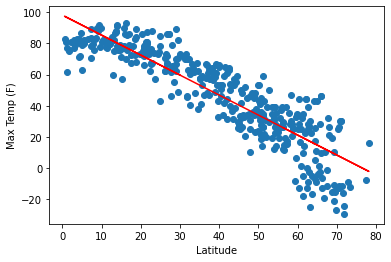

In [12]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
print(f"The r-sqaured is: {rvalue}")
plt.show()

Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6086642161727022


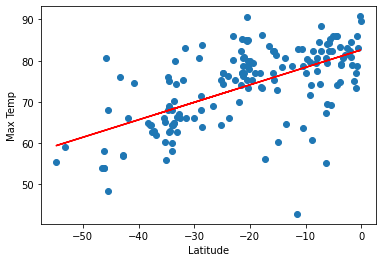

In [13]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")
plt.show()

Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3394260170764384


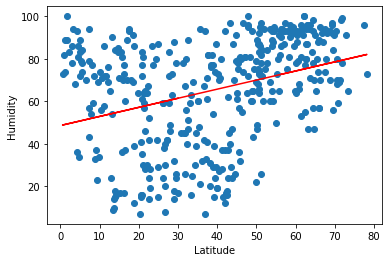

In [14]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue}")
plt.show()

Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1395054118144485


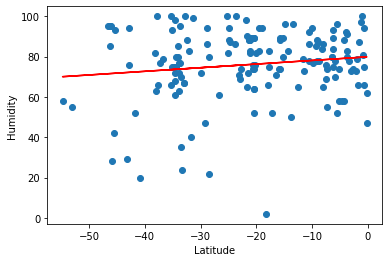

In [15]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue}")
plt.show()

Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.25179395711297686


<function matplotlib.pyplot.show(*args, **kw)>

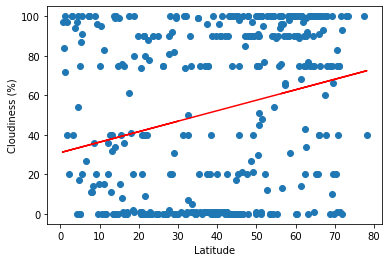

In [16]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Clouds']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue}")
plt.show

Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.19920946617869442


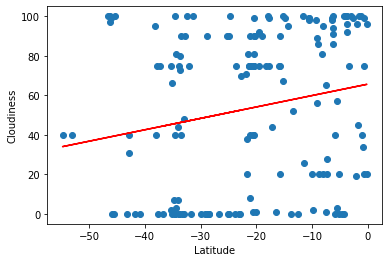

In [17]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Clouds']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue}")
plt.show()

Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0952692399860196


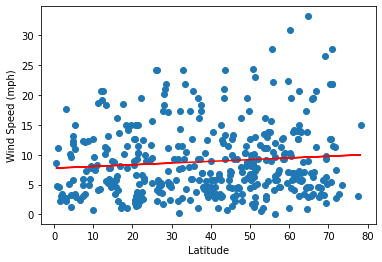

In [18]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {rvalue}")
plt.show()

Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.18504246111330075


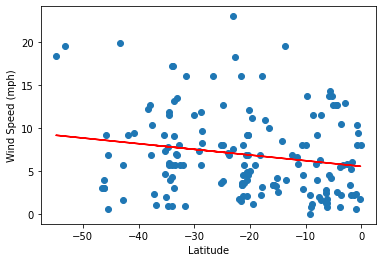

In [19]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {rvalue}")
plt.show()